In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'CSV\model_performance_results.csv')

In [6]:
df.head()

,model_name,ROC_AUC,Message,Accuracy,Avg Confidence,N Samples,Correct Avg Conf,Incorrect Avg Conf
0,gpt-4-0613,0.605305,Success,0.665306,9.024490,245,9.165644,8.743902
1,gpt-4o-2024-05-13,0.604065,Success,0.740072,8.859206,277,8.931707,8.652778
2,MistralLarge-Poe,0.601812,Success,0.605351,8.130435,299,8.292818,7.881356
3,claude-3-5-sonnet-20240620,0.600023,Success,0.740000,8.603333,300,8.662162,8.435897
4,Llama3.1-405B,0.592062,Success,0.640000,8.473333,300,8.552083,8.333333


In [5]:
df = df.rename(columns={"Unnamed: 0": "model_name"})

In [7]:
new_df = df[["model_name", "ROC_AUC", "Accuracy"]]

In [8]:
new_df.head()

,model_name,ROC_AUC,Accuracy
0,gpt-4-0613,0.605305,0.665306
1,gpt-4o-2024-05-13,0.604065,0.740072
2,MistralLarge-Poe,0.601812,0.605351
3,claude-3-5-sonnet-20240620,0.600023,0.740000
4,Llama3.1-405B,0.592062,0.640000


In [26]:
print(new_df["model_name"].to_list())

['gpt-4-0613', 'gpt-4o-2024-05-13', 'MistralLarge-Poe', 'claude-3-5-sonnet-20240620', 'Llama3.1-405B', 'gemma2-9b-it', 'Phi3-medium14b-Q6', 'GPT4Web', 'ClaudeOpuWeb-raw', 'claude-3-opus-20240229', 'Llama3-70b-Poe', 'gpt-4o-mini-2024-07-18', 'GeminiWeb-raw', 'GeminiAdvancedWeb-raw', 'claude-3-sonnet-20240229', 'gemma2-27b-it', 'mistral-instruct-v2-Q8', 'ClaudeSonnetWeb-raw', 'Mixtral-8x7B-Poe', 'GPT3.5Web', 'Gemma2-9b-Q8', 'Llama3.1-70B', 'Llama270B-Poe', 'ClaudeHiakuWeb-raw', 'claude-3-haiku-20240307', 'Llama-2-13b', 'Mistral-7B-T', 'Llama3.1-8B', 'llama2-13B-Q5KM', 'phi3-3b-Q16', 'Llama3-8b-Poe', 'llama3-8b-Q8', 'Llama27B-Poe', 'llama2-7B-Q8']


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

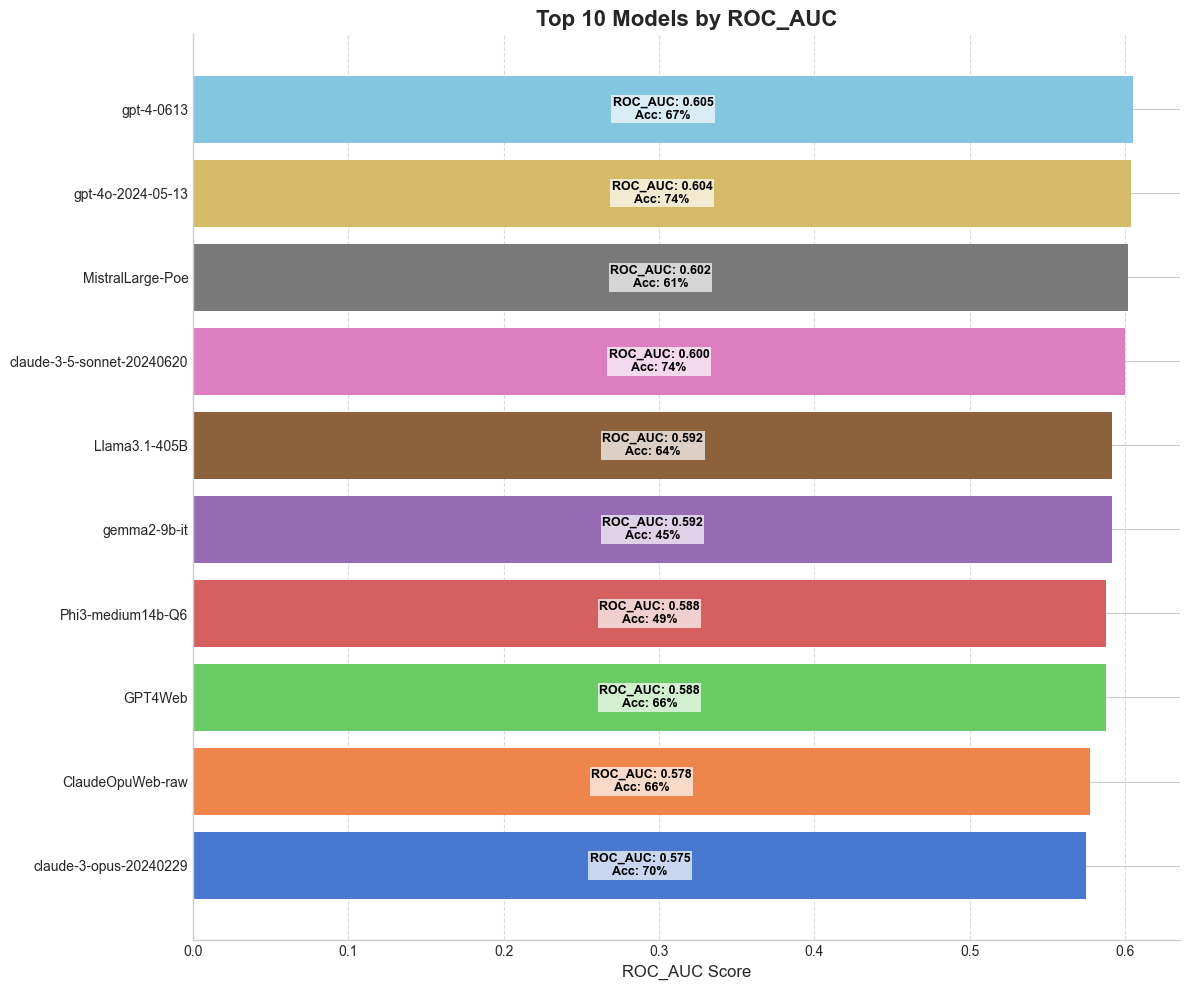

In [24]:
# Sort the dataframe by ROC_AUC in descending order and select top 10
top_10 = new_df.sort_values('ROC_AUC', ascending=False).head(10)

# Set the style to a more academic look
plt.style.use('seaborn-v0_8-whitegrid')
# Reverse the order so the top model is at the top of the chart
top_10 = top_10.iloc[::-1]


# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a color palette with 10 distinct but more subdued colors
colors = sns.color_palette("muted", n_colors=10)

# Plot the horizontal bars
y = range(len(top_10))
bars = ax.barh(y, top_10['ROC_AUC'], align='center', color=colors)

# Customize the plot
ax.set_xlabel('ROC_AUC Score', fontsize=12)
ax.set_title('Top 10 Models by ROC_AUC', fontsize=16, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(top_10['model_name'], fontsize=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels inside the bars
for i, (bar, auc, acc) in enumerate(zip(bars, top_10['ROC_AUC'], top_10['Accuracy'])):
    width = bar.get_width()
    ax.text(width/2, bar.get_y() + bar.get_height()/2,
            f'ROC_AUC: {auc:.3f}\nAcc: {acc*100:.0f}%',
            ha='center', va='center', fontsize=9, fontweight='bold',
            color='black', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1))

# Add a light grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()

# Save plot as high-resolution image
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Save plot as PDF
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')

# Save plot as JPEG
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [21]:
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [43]:
gpt_models = ['gpt-4-0613', 'gpt-4o-2024-05-13', 'GPT4Web', 'gpt-4o-mini-2024-07-18', 'GPT3.5Web']
claude_models = ['claude-3-5-sonnet-20240620', 'ClaudeOpuWeb-raw', 'claude-3-opus-20240229', 'claude-3-sonnet-20240229', 'ClaudeSonnetWeb-raw', 'ClaudeHiakuWeb-raw', 'claude-3-haiku-20240307']
mistral_models = ['MistralLarge-Poe', 'mistral-instruct-v2-Q8', 'Mistral-7B-T', 'Mixtral-8x7B-Poe']
google_models = ['gemma2-9b-it', 'GeminiWeb-raw', 'GeminiAdvancedWeb-raw', 'gemma2-27b-it', 'Gemma2-9b-Q8']
phi_models = ['Phi3-medium14b-Q6', 'phi3-3b-Q16']
others_models = ['Llama3.1-405B', 'Llama3-70b-Poe', 'Llama3.1-70B', 'Llama3.1-8B', 'llama2-13B-Q5KM', 'Llama-2-13b', 'Llama270B-Poe', 'Llama27B-Poe', 'llama3-8b-Q8', 'llama2-7B-Q8', 'Llama3-8b-Poe']

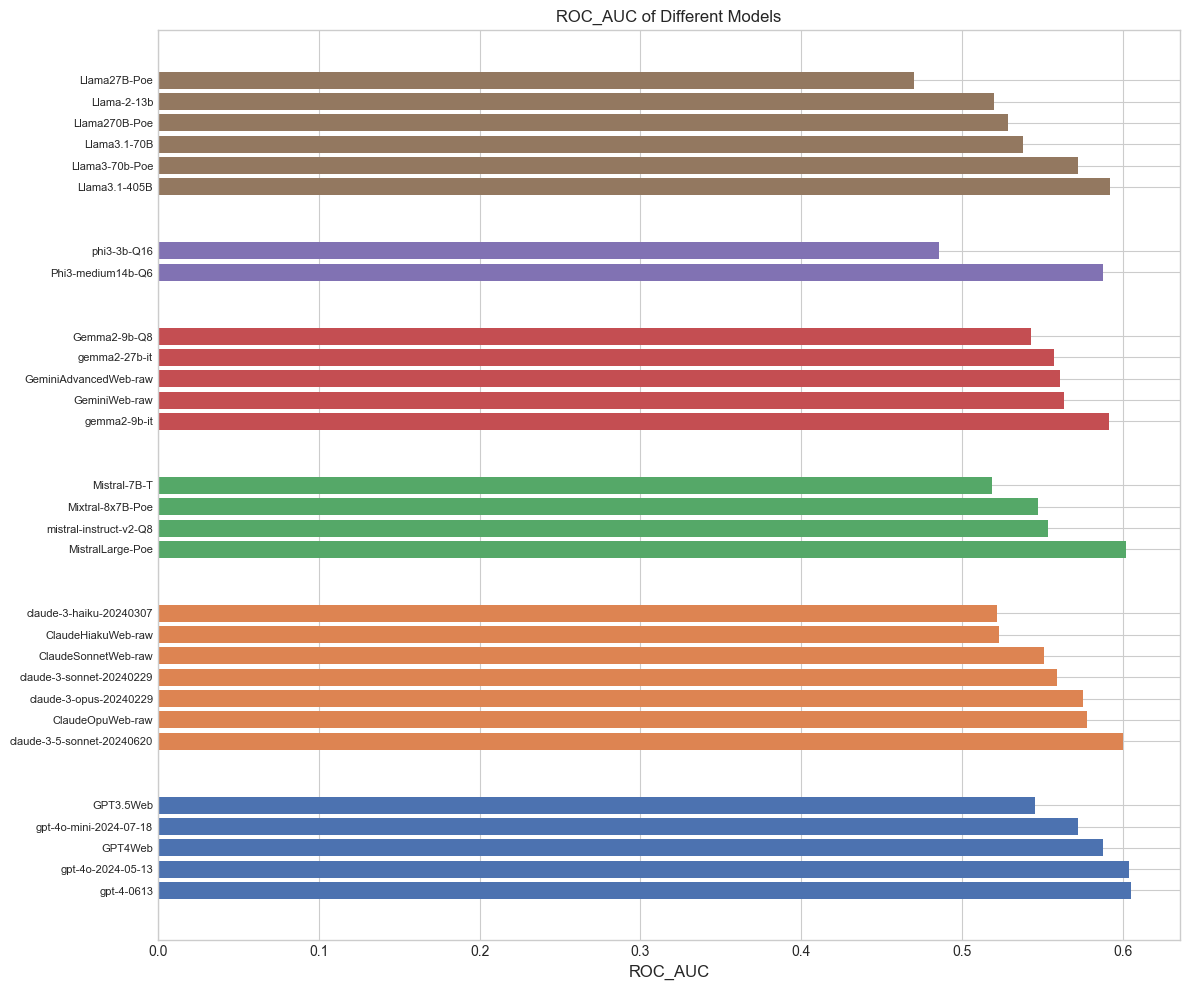

In [40]:
# Create DataFrames for each model list
gpt_df = new_df[new_df['model_name'].isin(gpt_models)].sort_values('ROC_AUC', ascending=False)
claude_df = new_df[new_df['model_name'].isin(claude_models)].sort_values('ROC_AUC', ascending=False)
mistral_df = new_df[new_df['model_name'].isin(mistral_models)].sort_values('ROC_AUC', ascending=False)
google_df = new_df[new_df['model_name'].isin(google_models)].sort_values('ROC_AUC', ascending=False)
phi_df = new_df[new_df['model_name'].isin(phi_models)].sort_values('ROC_AUC', ascending=False)
others_df = new_df[new_df['model_name'].isin(others_models)].sort_values('ROC_AUC', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Keeping track of y-axis positions and labels
y_positions = []
y_tick_labels = []

# Gap between different model groups for visibility
gap_between_groups = 2

## Now perform plotting for each model group, updating `y_positions` and `y_tick_labels` accordingly

# GPT models
y_start = 0  # Start position for the y-axis
y_pos = list(range(y_start, y_start + len(gpt_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(gpt_df['model_name'])
ax.barh(y_pos, gpt_df['ROC_AUC'], align='center')

# Add gap between groups
y_start += len(gpt_df) + gap_between_groups

# Claude models
y_pos = list(range(y_start, y_start + len(claude_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(claude_df['model_name'])
ax.barh(y_pos, claude_df['ROC_AUC'], align='center')

# Add gap between groups
y_start += len(claude_df) + gap_between_groups

# Mistral models
y_pos = list(range(y_start, y_start + len(mistral_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(mistral_df['model_name'])
ax.barh(y_pos, mistral_df['ROC_AUC'], align='center')

# Add gap between groups
y_start += len(mistral_df) + gap_between_groups

# Google models
y_pos = list(range(y_start, y_start + len(google_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(google_df['model_name'])
ax.barh(y_pos, google_df['ROC_AUC'], align='center')

# Add gap between groups
y_start += len(google_df) + gap_between_groups

# PHI models
y_pos = list(range(y_start, y_start + len(phi_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(phi_df['model_name'])
ax.barh(y_pos, phi_df['ROC_AUC'], align='center')

# Add gap between groups
y_start += len(phi_df) + gap_between_groups

# Other models
y_pos = list(range(y_start, y_start + len(others_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(others_df['model_name'])
ax.barh(y_pos, others_df['ROC_AUC'], align='center')

# Finally, set the y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(y_tick_labels, fontsize=8)

# Set the title and x-axis label
ax.set_title('ROC_AUC of Different Models')
ax.set_xlabel('ROC_AUC', fontsize=12)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

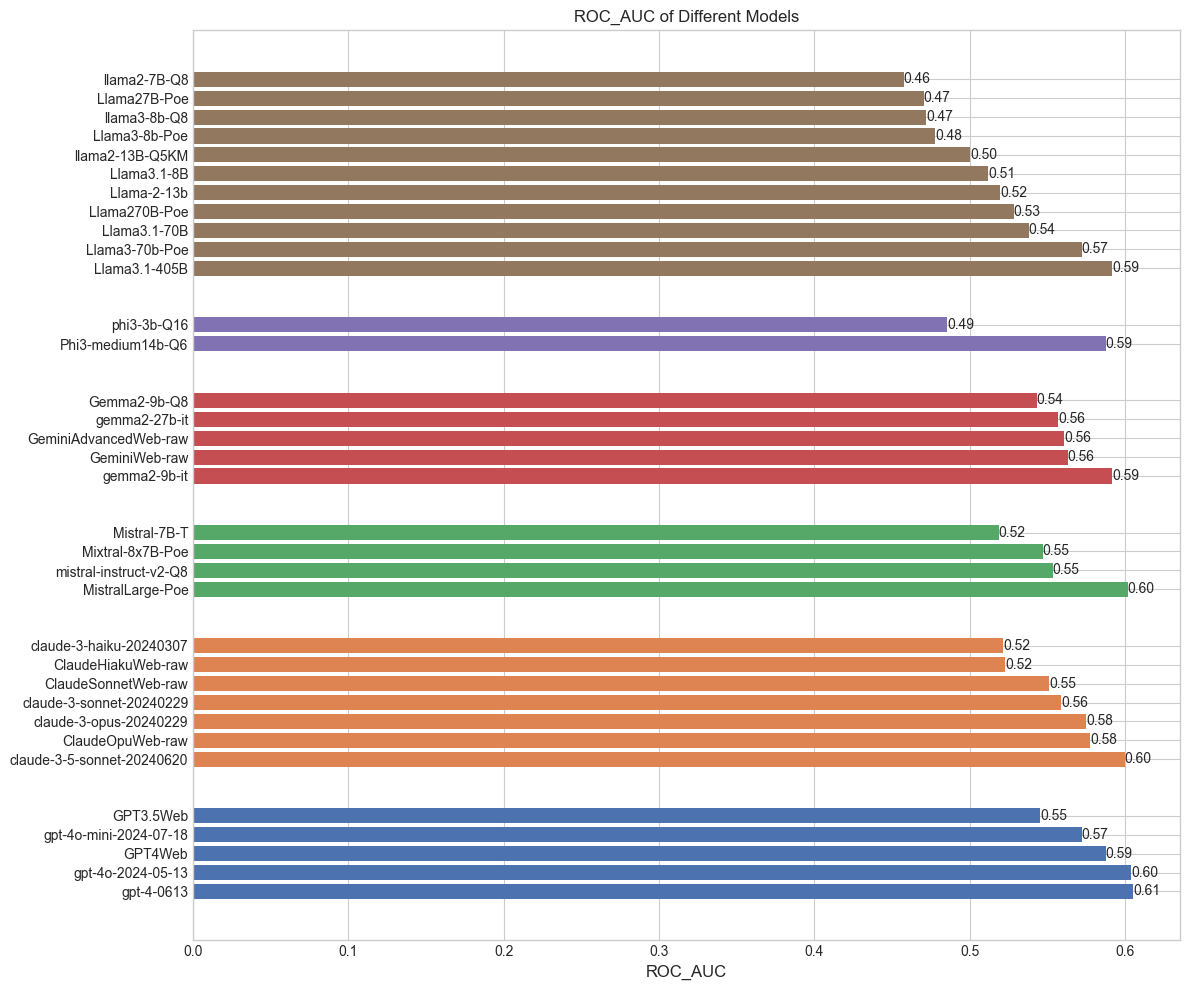

In [54]:
# Create DataFrames for each model list
gpt_df = new_df[new_df['model_name'].isin(gpt_models)].sort_values('ROC_AUC', ascending=False)
claude_df = new_df[new_df['model_name'].isin(claude_models)].sort_values('ROC_AUC', ascending=False)
mistral_df = new_df[new_df['model_name'].isin(mistral_models)].sort_values('ROC_AUC', ascending=False)
google_df = new_df[new_df['model_name'].isin(google_models)].sort_values('ROC_AUC', ascending=False)
phi_df = new_df[new_df['model_name'].isin(phi_models)].sort_values('ROC_AUC', ascending=False)
others_df = new_df[new_df['model_name'].isin(others_models)].sort_values('ROC_AUC', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Keeping track of y-axis positions and labels
y_positions = []
y_tick_labels = []

# Gap between different model groups for visibility
gap_between_groups = 2

## Now perform plotting for each model group, updating `y_positions` and `y_tick_labels` accordingly

# GPT models
y_start = 0  # Start position for the y-axis
y_pos = list(range(y_start, y_start + len(gpt_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(gpt_df['model_name'])
bars = ax.barh(y_pos, gpt_df['ROC_AUC'], align='center')

# Add ROC_AUC text labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center')

# Add gap between groups
y_start += len(gpt_df) + gap_between_groups

# Claude models
y_pos = list(range(y_start, y_start + len(claude_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(claude_df['model_name'])
bars = ax.barh(y_pos, claude_df['ROC_AUC'], align='center')

# Add ROC_AUC text labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center')

# Add gap between groups
y_start += len(claude_df) + gap_between_groups

# Mistral models
y_pos = list(range(y_start, y_start + len(mistral_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(mistral_df['model_name'])
bars = ax.barh(y_pos, mistral_df['ROC_AUC'], align='center')

# Add ROC_AUC text labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center')

# Add gap between groups
y_start += len(mistral_df) + gap_between_groups

# Google models
y_pos = list(range(y_start, y_start + len(google_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(google_df['model_name'])
bars = ax.barh(y_pos, google_df['ROC_AUC'], align='center')

# Add ROC_AUC text labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center')

# Add gap between groups
y_start += len(google_df) + gap_between_groups

# PHI models
y_pos = list(range(y_start, y_start + len(phi_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(phi_df['model_name'])
bars = ax.barh(y_pos, phi_df['ROC_AUC'], align='center')

# Add ROC_AUC text labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center')

# Add gap between groups
y_start += len(phi_df) + gap_between_groups

# Other models
y_pos = list(range(y_start, y_start + len(others_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(others_df['model_name'])
bars = ax.barh(y_pos, others_df['ROC_AUC'], align='center')

# Add ROC_AUC text labels on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width():.2f}', va='center')
    
# Finally, set the y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(y_tick_labels, fontsize=10)

# Set the title and x-axis label
ax.set_title('ROC_AUC of Different Models')
ax.set_xlabel('ROC_AUC', fontsize=12)

# Show the plot with tight layout
plt.tight_layout()

# Save plot as high-resolution image
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Save plot as PDF
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')

# Save plot as JPEG
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')

plt.show()

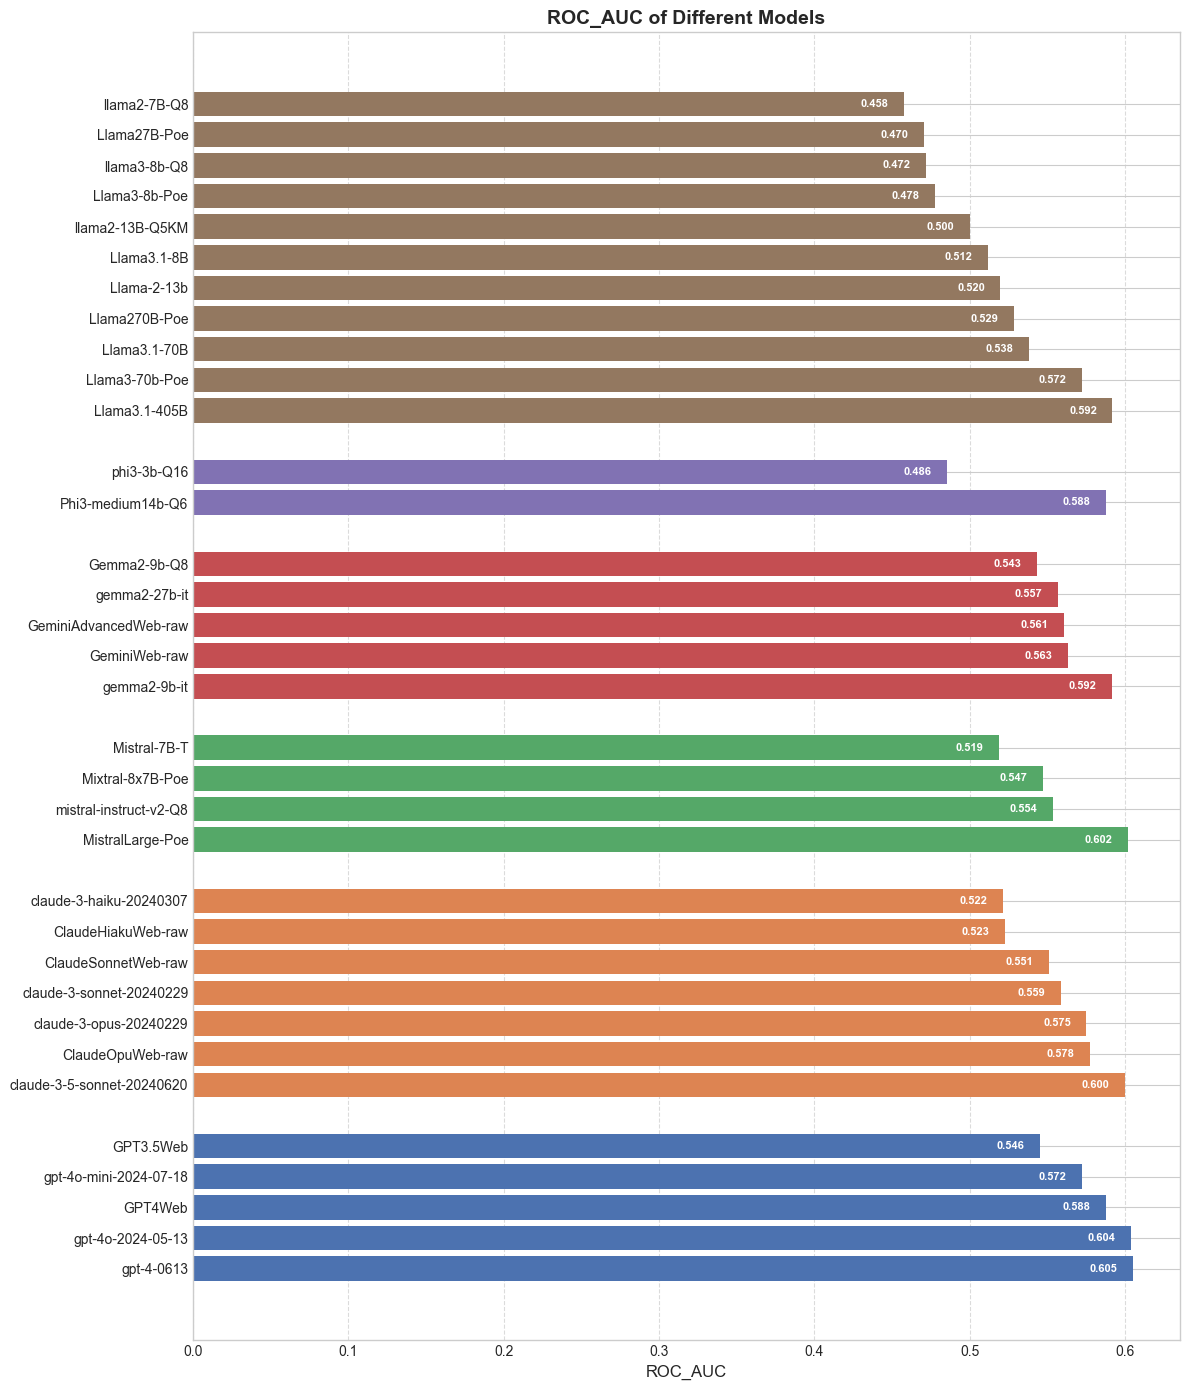

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming new_df is your existing DataFrame with model data

def create_model_df(models, new_df):
    df = pd.DataFrame({'model_name': models})
    df = df.merge(new_df[['model_name', 'ROC_AUC']], on='model_name', how='left')
    df['ROC_AUC'] = df['ROC_AUC'].fillna(0)  # Fill missing values with 0
    return df.sort_values('ROC_AUC', ascending=False)

# Create DataFrames for each model list
# (Assuming you have these lists defined)
gpt_df = create_model_df(gpt_models, new_df)
claude_df = create_model_df(claude_models, new_df)
mistral_df = create_model_df(mistral_models, new_df)
google_df = create_model_df(google_models, new_df)
phi_df = create_model_df(phi_models, new_df)
others_df = create_model_df(others_models, new_df)

# Set up a color palette using seaborn
colors = sns.color_palette("deep", 6)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 14))

# Keeping track of y-axis positions and labels
y_positions = []
y_tick_labels = []

# Gap between different model groups for visibility
gap_between_groups = 1

def plot_model_group(df, y_start, color):
    y_pos = list(range(y_start, y_start + len(df)))
    y_positions.extend(y_pos)
    y_tick_labels.extend(df['model_name'])
    bars = ax.barh(y_pos, df['ROC_AUC'], align='center', color=color)
    
    # Add ROC_AUC values inside the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width - 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='right', va='center', fontsize=8, 
                color='white', fontweight='bold')
    
    return y_start + len(df) + gap_between_groups

# Plot each model group
y_start = 0
y_start = plot_model_group(gpt_df, y_start, colors[0])
y_start = plot_model_group(claude_df, y_start, colors[1])
y_start = plot_model_group(mistral_df, y_start, colors[2])
y_start = plot_model_group(google_df, y_start, colors[3])
y_start = plot_model_group(phi_df, y_start, colors[4])
y_start = plot_model_group(others_df, y_start, colors[5])

# Set the y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(y_tick_labels, fontsize=10)

# Set the title and x-axis label
ax.set_title('ROC_AUC of Different Models', fontsize=14, fontweight='bold')
ax.set_xlabel('ROC_AUC', fontsize=12)

# Show grid lines for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
# Save plot as high-resolution image
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Save plot as PDF
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')

# Save plot as JPEG
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
new_df